# **HOTEL BOOKING CANCELLATION - PREDICTIVE ANALYSIS**

Machine Learning Pipeline:

1. Problems Framing and Data Understanding
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Training  
5. Evaluation, Model Selection, and Model Tuning  
6. Conclusion and Recommendation

# **1. PROBLEMS FRAMING AND DATA UNDERSTANDING**

## *1.1 Context*

COVID-19 has affected every sector across the globe, and the hotel industry is among the hardest hit. Like so many industries, hospitality will also see both subtle and substantial shifts in the post-pandemic era. Some are already apparent today, such as the green light given by governments to open their airports for domestic or international flights. It allows people who have been in quarantine for a couple of years to pack their travel bags and go on holiday. The effect of these new circumstances will increase the demand for hotel reservations and also create more fierce competition among other hotels to give the best deals. Accurate information on room availability can prevent the hotel from various losses, such as profit loss caused by guests who cancel reservations at the last minute.

Guests who cancel their reservations, either notifying the hotel in advance (e.g., contacting themselves or being contacted by the hotel) or not, will cause vacancies in the rooms they should be staying in. These rooms can actually still be rented again to other guests, but it will be more difficult to decide immediately which rooms can be republished if the news of the cancellation is received at the last minute/ few days before the check-in date.

The cancellation of bookings impacts a hotel on various fronts:

- Loss of resources (revenue) when the hotel cannot resell the room.
- Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
- Lowering prices at the last minute so the hotel can resell a room, resulting in reducing the profit margin.

Therefore, predicting reservations that can be cancelled and preventing these cancellations will create a surplus value for the institutions.

In this scenario, a hotel business owner in Bali asked for help to solve their problem, which has a 37% cancellation rate. As a data scientist, I would like to provide solutions by identifying problems, analysing data to generate insights, creating machine learning models with algorithms that can predict as accurately as possible on the cancellation, and providing recommendations based on the overall results I'll receive. 

Here is the definition of each target for this case:

    0 = Not cancelled guests 
    Guests who don't cancel the reservation defined as one who show up at the hotel.

    1 = Cancelled guests
    Guests who cancel the reservation defined as one who cancel days before arrival date or at the last minute.


## *1.2 Problem Understanding*

For the business, providing the option to cancel a booking potentially generates more demand and helps to anticipate occupancy. With the customer, they have more confidence to book, along with a safety net in situations like flight delays. However, the costs borne by the business due to cancellations are unutilised capacity and discounted room prices, leading to reduced profits. Hotels also bear additional costs associated with overbooking (reallocation costs, cash or service compensation, marketing budget, and particularly important today, social reputation costs).

Therefore, it's important for stakeholders to minimise the rate of booking cancellation in order to obtain high revenue by maximising the number of rooms available in the hotel. The best way to gain occupancy is to make predictions using machine learning so that we know who will cancel the order beforehand, in a sense to avoid profit losses.

## *1.3 Problem Statement*

Upon understanding the above issues and stakeholders involved, I came up with a conclusion to the problem statement. There are two important points that need to be given attention before formulating the problems, such as goal and values. Our goal here is to predict the booking cancellations as accurately as possible in order to achieve values in which to mitigate revenue loss derived from booking cancellations and the risks associated with overbooking.

**Machine Learning Task**

Here I will make predictions using machine learning with the Supervised Learning method for Binary Classification.. There is already a ground truth, or a marker, whether someone cancels their order or not. In addition to providing predictions on booking cancellations, the stakeholders also hope to find out the factors/variables that affect guests' decisions to cancel, so that they can make a good strategy in anticipating high cancellation rates.

## *1.4 Analytic Approach*

Next, what we're going to analyse the data to find patterns that differentiate the guests who want to cancel their reservation from those who don't.

Then we will build a classification model that will help hotels predict the probability of guests who are likely to cancel their reservations or not.

**Risk**:  
The risk that may occur as a result of the model is that customers who do not cancel their orders will be labelled as "cancelled guests" by the machine learning model we'll build. 

## *1.5 Metric Analysis*

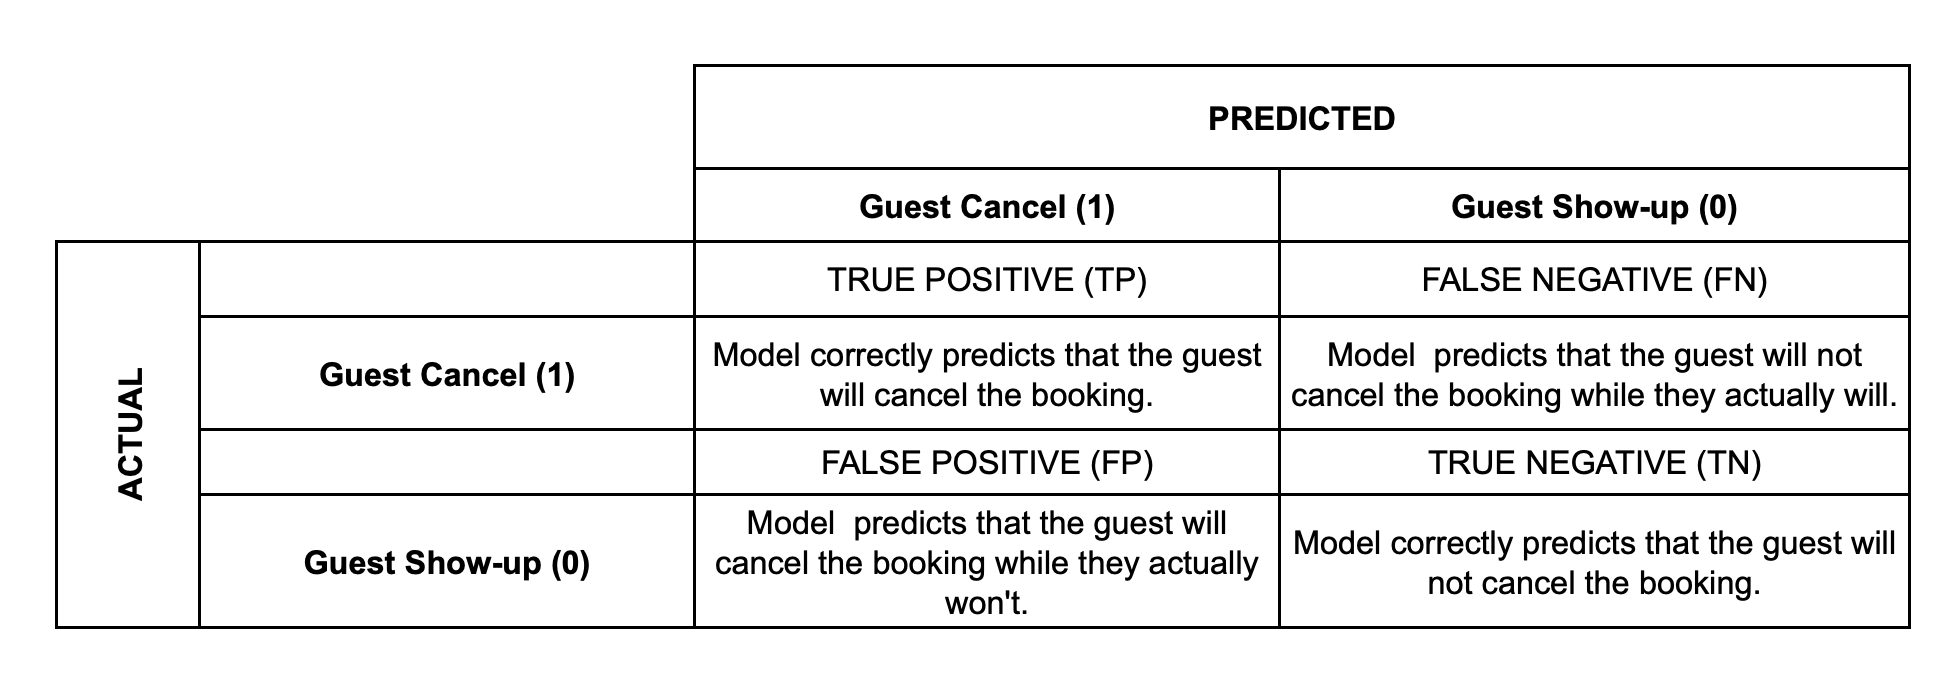

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Matrix Hotel Booking.png')

> **Summary**

Type 1 error : False Positive (guest predicted will cancel but actually not)   
Consequence : high risk of overbooking

Type 2 error : False Negative (guest predicted won't cancel but actually will)    
Consequence : loss revenue due to unutilised rooms

**Metric Analysis**  

Referring to the *metric evaluation* above, we need to minimise the False Negative Rate (minimise risk of loss revenue). If the model fails to minimise the False Negative Rate (Type 2 error), it means that the guest who is supposed to cancel is predicted by the model as a guest who wouldn't cancel. If this happens, the business owner will experience a loss of customers, which can increase the risk of losing revenue due to unoccupied rooms that could be resold or republished on online travel agencies. 

However, we should pay attention to the score of False Positive (Type 1 error) in the prediction results. If it is high, it means that the model incorrectly predicts guests who want to cancel. This will lead to the high risk of overbooking. When the model predicts a guest will cancel the room, we will take action by reselling/republishing the room by online/offline. If the prediction were wrong and someone had booked this occupied room, that would cause overbooking if there was no similar room available.  

So, the model we are after is a model that provides accurate predictions in the positive class with a higher recall score to avoid losing revenue and unutilised capacity. However, we need to make sure that the precision score has a good measure to avoid the risk of overbooking. So we have to balance between precision and recall of 1 positive class. So the main metric of prediction will be **f1-score**, but we will also pay attention to the **recall** score and ensure that it is greater than **precision**. In addition, the purpose of using the f1-score is one method to overcome the imbalance of data in the positive class (Guest cancel) and the negative class (Guest Show-up).

## *Import Libraries*

In [2]:
# numeric calculation
import numpy as np
import statistics as st

# dataframe
import pandas as pd
from collections import Counter

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# data splitting 
from sklearn.model_selection import train_test_split, cross_val_score

# preprocessing
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics

# tuning
import optuna

import warnings
warnings.filterwarnings('ignore')


## *1.6 Data Understanding*

The dataset originated from an article of Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. However, the data I used here has been processed and selected based on business objectives.

This dataset consists of guest booking information from one of the world’s major leading chains of hotels, homes, and spaces. The information given should be used to build some predictive models to classify whether a hotel booking is likely to be canceled, which can affect the revenue stream. Further details about each feature/column are as follows:

In [3]:
# load data
df_ori = pd.read_csv('data_hotel_booking_demand.csv')
df_hotel = df_ori.copy()

df_hotel.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


> ### *Feature Description*

1. `country`  
Country of origin. Categories are represented in the ISO 3155–3:2013 format.

2. `market_segment`  
A group of people who share one or more common characteristics, lumped together for marketing purposes. 
    - TA: Travel agents
    - TO: Tour operators  
<br />    

3. `previous_cancellations`  
Number of previous bookings that were cancelled by the customer prior to the current booking.

4. `booking_changes`  
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS (Property Management System) until the moment of check-in or cancellation.

5. `deposit_type`  
An dndication on whether the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

6. `day_in_waiting_list`  
Number of days the booking was in the waiting list before it was confirmed to the customer.

7. `customer_type`  
    Contract - when the booking has an allotment or other type of contract associated to it;  
    Group – when the booking is associated to a group;  
    Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;  
    Transient-party – when the booking is transient, but is associated to at least other transient booking.
    
8. `reserved_room_type`  
Code of room type reserved. For anonymity reasons, the code is presented instead of designation.

9. `required_car_parking_spaces`  
Number of car parking spaces required by the customer.

10. `total_of_special_requests`  
Number of special requests made by the customer (e.g. twin bed or high floor).

11. ``is_canceled``  
    1: Canceled  
    0: Not canceled

In [4]:
# data train details

list_item = []
for col in df_hotel.columns:
    list_item.append([col, df_hotel[col].dtype, len(df_hotel), 
    df_hotel[col].isna().sum(), round((df_hotel[col].isna().sum()/len(df_hotel[col]))*100,2),
    df_hotel[col].nunique(), list(df_hotel[col].drop_duplicates().sample(2, replace=True).values)])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)

df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,previous_cancellations,int64,83573,0,0.00,15,"[21, 0]"
1,booking_changes,int64,83573,0,0.00,19,"[21, 10]"
2,days_in_waiting_list,int64,83573,0,0.00,115,"[57, 99]"
3,required_car_parking_spaces,int64,83573,0,0.00,5,"[1, 3]"
4,total_of_special_requests,int64,83573,0,0.00,6,"[4, 1]"
5,is_canceled,int64,83573,0,0.00,2,"[0, 0]"
6,country,object,83573,351,0.42,162,"[ZWE, LTU]"
7,market_segment,object,83573,0,0.00,8,"[Undefined, Groups]"
8,deposit_type,object,83573,0,0.00,3,"[No Deposit, Refundable]"
9,customer_type,object,83573,0,0.00,4,"[Contract, Transient-Party]"


**Data Summary**  

- We have 83573 rows/observations and 11 features/columns.
- The only feature that has missing values in the train set is in column `country`. It takes 0.42% out of 83,573 observations.
- We have 5 categorical data such as `country`, `market_segment`, `deposit_type`, `customer_type`, and `reserved_room_type`.
- The following are the numerical features in our data: `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, and `total_of_special_requests`.
- The feature that will be considered as our target is `is_canceled`, where 0 indicates `not canceled` and 1 as `canceled`.


# **2. EDA**

Before we start with the Exploratory Data Analysis (EDA), it would be worthwhile to differentiate which columns are categorical and which are numerical. This is useful for determining the type of visualisation that can later be performed.

We can see that there are 11 columns that contain 5 categorical features and 6 numerical features as follows.

In [5]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [6]:
df_hotel.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
previous_cancellations,83573.0,0.086798,0.841011,0.0,0.0,0.0,0.0,26.0
booking_changes,83573.0,0.220897,0.648635,0.0,0.0,0.0,0.0,21.0
days_in_waiting_list,83573.0,2.330561,17.673051,0.0,0.0,0.0,0.0,391.0
required_car_parking_spaces,83573.0,0.062999,0.246919,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,83573.0,0.573211,0.795163,0.0,0.0,0.0,1.0,5.0
is_canceled,83573.0,0.368277,0.482340,0.0,0.0,0.0,1.0,1.0


## *2.1 Correlation*

To shorten the EDA process, we will not do EDA for the entire column but only for the columns that do have a high influence on the target variable, namely is_cancelled. Seeing the result of the statistical correlation test below, we conclude that the numerical features with the highest correlation are `total_of_special_requests` (24%), `required_car_parking_spaces` (19%), `booking_changes`(15%). Therefore, we will analyse these 3 numerical features only, and we will do analysis for all categories afterwards.

In [7]:
df_hotel.corr()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000000,-0.027361,0.006895,-0.018208,-0.048026,0.109598
booking_changes,-0.027361,1.000000,-0.010687,0.068508,0.055748,-0.145746
days_in_waiting_list,0.006895,-0.010687,1.000000,-0.030333,-0.083275,0.056203
required_car_parking_spaces,-0.018208,0.068508,-0.030333,1.000000,0.083678,-0.194807
total_of_special_requests,-0.048026,0.055748,-0.083275,0.083678,1.000000,-0.235993
is_canceled,0.109598,-0.145746,0.056203,-0.194807,-0.235993,1.000000


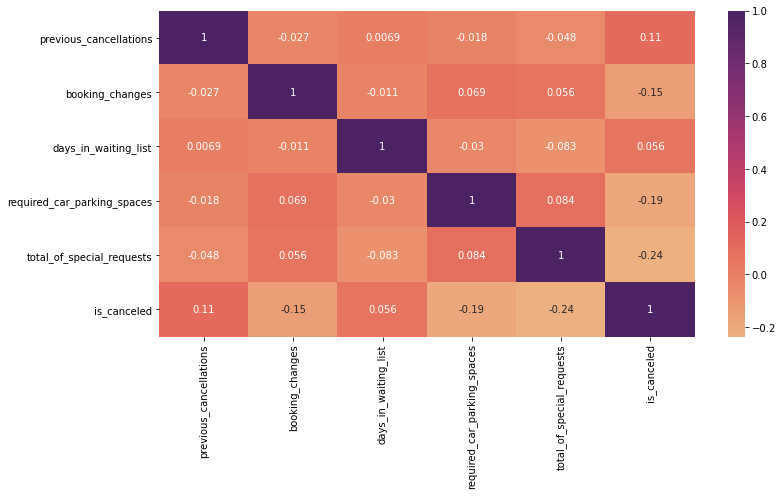

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df_hotel.corr(), annot=True, cmap='flare')
plt.show()

In [9]:
df_hotel.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                    1.000000
total_of_special_requests      0.235993
required_car_parking_spaces    0.194807
booking_changes                0.145746
previous_cancellations         0.109598
days_in_waiting_list           0.056203
Name: is_canceled, dtype: float64

## *2.2 Cancellation percentage*

According to the graph below, 63.17% of reservations were confirmed and 36,83% of the bookings were cancelled or guests didn't show up at the hotel.

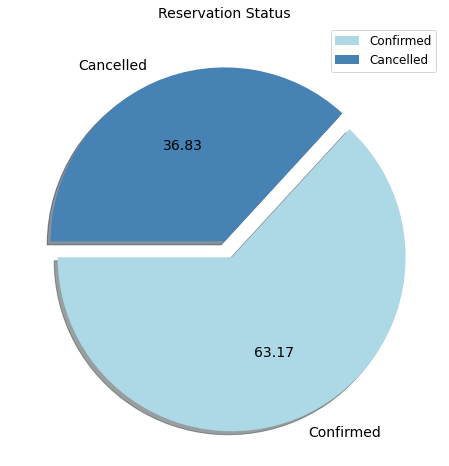

In [10]:
plt.figure(figsize= (14, 8))
plt.pie(df_hotel['is_canceled'].value_counts(),
                    autopct = '%.2f',
                    explode = [0.1,0],
                    labels = ['Confirmed', 'Cancelled'],
                    shadow = True, 
                    textprops = {'fontsize':14},
                    colors = ['lightblue', 'steelblue'],
                    startangle = 180
)
plt.title('Reservation Status', fontsize = 14)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

## *2.3 Categorical Features Analysis*

As mentioned above, we have 5 categorical features. Now let's check the general distribution of each column based on its 'is_canceled' value.

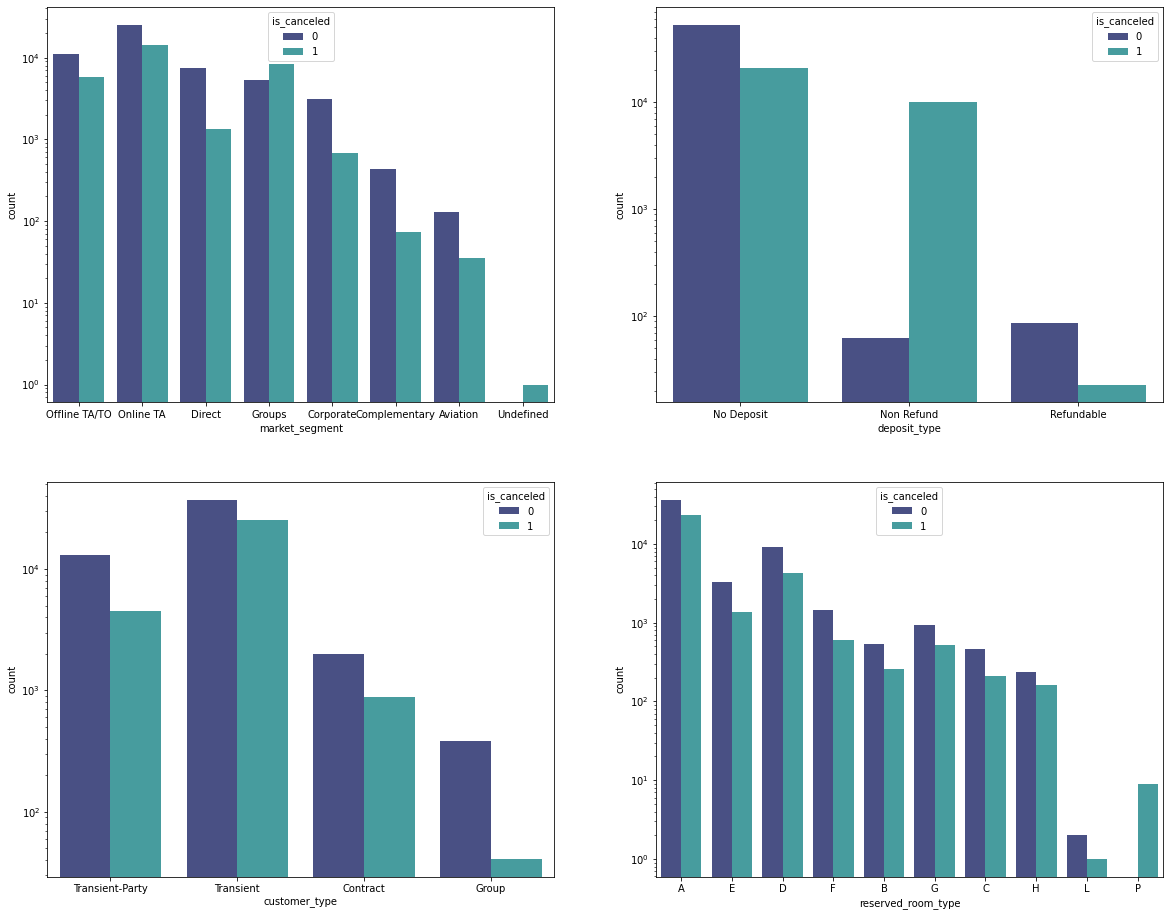

In [11]:
# select all features that have object types
categorical_var = df_hotel.dtypes[df_hotel.dtypes == object][1:].index.tolist()

# create 4 empty plots
fig, ax = plt.subplots(2, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, ctg in enumerate(categorical_var):
    g = sns.countplot(x = ctg, hue = 'is_canceled', data = df_hotel, palette= 'mako', log = True, ax = ax.flatten()[ix])

## *2.4 Numerical Features Analysis*

Now, let's take a look at the distribution analysis of numerical features in accordance with the value of the 'is_canceled' value.

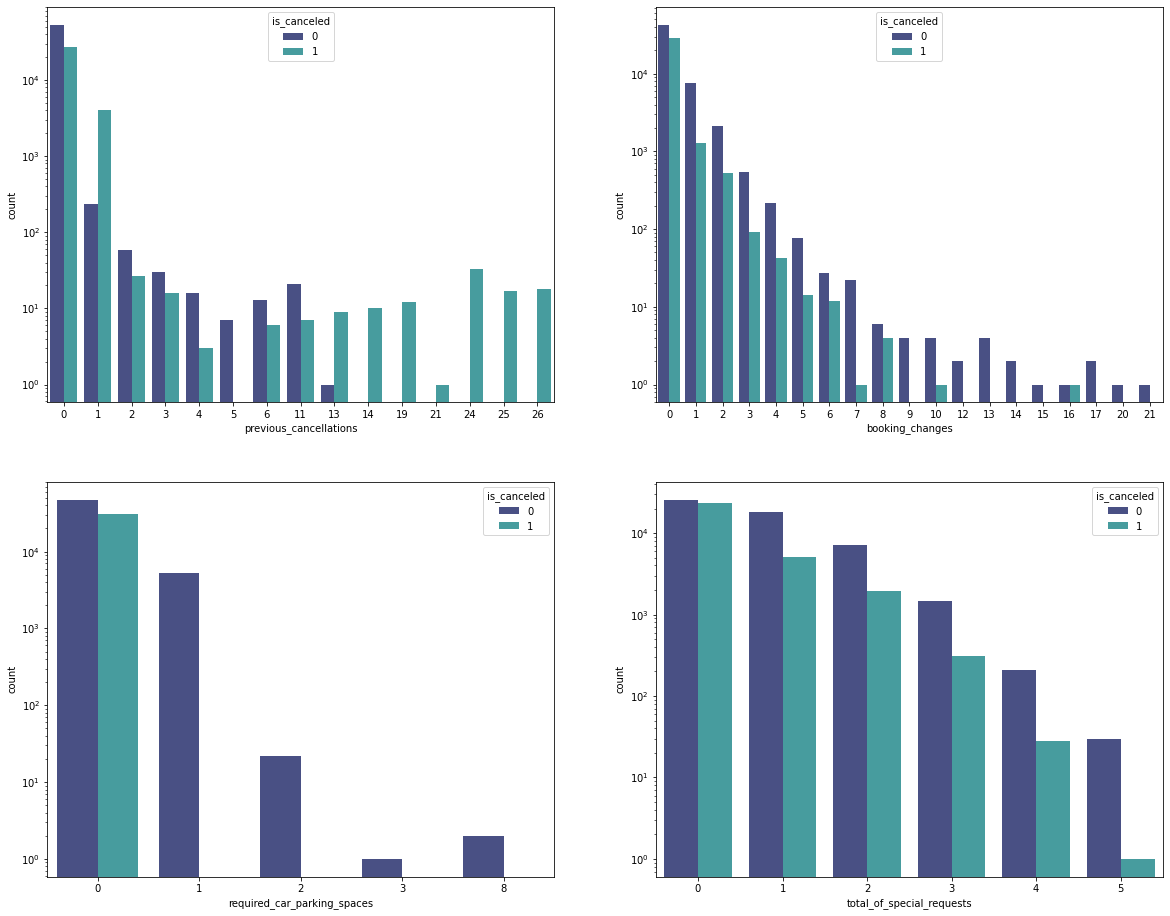

In [12]:
# Numerical EDA
numeric_var = df_hotel[['previous_cancellations', 'booking_changes', 'required_car_parking_spaces','total_of_special_requests']]

# create 14 empty plots
fig, ax = plt.subplots(2, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, num in enumerate(numeric_var):
    g = sns.countplot(x = num, hue = 'is_canceled',  data = df_hotel, palette = 'mako', log = True, ax = ax.flatten()[ix])

In [13]:
# top 10 countries cancelled bookings
cancel_num = df_hotel[df_hotel['is_canceled'] == 1]['country'].value_counts().reset_index()
cancel_num.columns = ['country', 'cancelled guests']
cancel_num.head(10)

,country,cancelled guests
0,PRT,19157
1,GBR,1724
2,ESP,1546
3,FRA,1366
4,ITA,935
5,DEU,844
6,BRA,584
7,IRL,576
8,USA,355
9,CHN,327


In [14]:
origin_guests = df_hotel[df_hotel['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_guests.columns = ['country', 'No of guests']
origin_guests.head(10)

,country,No of guests
0,PRT,14940
1,GBR,6771
2,FRA,5941
3,ESP,4450
4,DEU,4272
5,IRL,1764
6,ITA,1723
7,BEL,1322
8,NLD,1188
9,USA,1117


In [15]:
# using Plotly.express to plot a choropleth map
import plotly.express as px

px.choropleth(origin_guests,
                    locations = "country",
                    color= "No of guests", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

## *2.5 Findings & Solutions*

1. Most of the distribution channels and market segments involve travel agencies (online or offline). It means that we can target our partners on these travel agencies' websites and work with them in a sense since the majority of the visitors tend to reach out to them. Speaking of cancellation rates, only the "Groups" segment tends to surpass the non-cancelled guests. We suggest that the Online TA and Offline TA/TO segments have the highest rate of booking cancellation, although it has been surpassed by their "non-cancelled" bookings. The lowest cancellation rate came from the 'Direct' segment and the 'Corporate' segment. From here, I conclude that the cancellations made collectively, like group reservations, tend to have a high cancellation rate.

2. Around 28% of bookings were cancelled by guests without deposits, followed by another 18% of bookings by guests with refundable deposits. These numbers might lead to significant losses if the hotels were not able to handle this problem in time. So it's obvious that guests who do not pay any deposits to secure their reservations are likely to cancel them later. Also, it is understandable why guests prefer to make a reservation without giving any deposits. They might feel more comfortable paying the bookings at the check-in counter or charging them by credit card the day before the check-in date. Looking back to the first findings where the group reservations were prone to cancellations, we came up with a solution that the booking managers should impose a new policy on group bookings for paying the room reservations in advance. 

3. The majority of the bookings are Transient, which also has a higher cancellation rate. Transient guests are guests making reservations on their own, usually directly with the hotel. This group includes walk-in guests, business travelers, last-minute bookers, and those who require a short-term stay. Stakeholders could consider giving special deals for Transient guests in order to retain them for room reservations that will reduce the cancellation rate.

4. It seems that the fewer guests make changes to their reservations, the higher the risk of cancellations. To overcome this issue, we can probably offer extra services such as daily tours, car/bike rentals, or other interesting services to keep them interested in staying in our hotel.

5. Around 55% of bookings do not have any special requests, which leads to a high number of cancellations. Besides, around 40% of guests have one or two special requests, with a low rate of booking cancellations. So, the higher the number of special requests, the lower the possibility of canceling their bookings. 

6. Portugal, the UK, France, Spain, and Germany are the top countries of the guests who stayed in this hotel; more than 80% come from these 5 countries. However, Portugal also has a great number of cancellations, followed by the UK, Spain, and so forth. One solution to this issue is probably to enforce a sensible cancellation policy for these countries during the off-season.

Based on the EDA analysis above, we came up to removing 2 numerical features for the modeling process. That now leaves us with 8 features as follows:

1. total_of_special_requests
2. required_car_parking_spaces
3. booking_changes
4. country
5. market_segment
6. deposit_type
7. customer_type
8. reserved_room_type

In [16]:
# drop 2 columns
df_hotel.drop(['previous_cancellations', 'days_in_waiting_list'], axis=1, inplace=True)

In [17]:
df_hotel

,country,market_segment,booking_changes,deposit_type,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,No Deposit,Transient-Party,A,0,0,0
1,FRA,Online TA,0,No Deposit,Transient,A,0,2,0
2,PRT,Online TA,1,No Deposit,Transient,A,0,2,0
3,NLD,Online TA,0,No Deposit,Transient,A,0,1,1
4,PRT,Online TA,2,No Deposit,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,No Deposit,Contract,A,0,3,1
83569,FRA,Online TA,0,No Deposit,Transient,D,0,2,0
83570,PRT,Online TA,1,No Deposit,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,No Deposit,Transient-Party,A,0,0,0


# **3. FEATURE ENGINEERING**

*Feature Engineering* will help us deal with *missing values* by using *imputer* techniques and using *encoding techniques to transform categorical features into numerical data types. First, we have to separate the data into 2 sets: Train Set and Test Set.

Since we'll only use tree-based models, we'll create a preprocessor that does not need a scaler but only an encoder and an imputer.

In [18]:
# splitting data
df_train, df_test = train_test_split(
    df_hotel, test_size = 0.3, random_state = 88, 
    stratify = df_hotel['is_canceled']
)

In [19]:
print(df_train['is_canceled'].value_counts(normalize=True))
print('========')
print(df_test['is_canceled'].value_counts(normalize = True))

0    0.631716
1    0.368284
Name: is_canceled, dtype: float64
0    0.631741
1    0.368259
Name: is_canceled, dtype: float64


In [20]:
# splitting data
X_train = df_train.drop('is_canceled', axis=1)
X_test = df_test.drop('is_canceled', axis=1)

y_train = df_train['is_canceled']
y_test = df_test['is_canceled']

In [21]:
# unique values of each column
for col in df_train.columns:
    print(f"{col}: \n{df_train[col].unique()}\n")

country: 
['PRT' 'ESP' 'ITA' 'CHE' 'BEL' 'GBR' 'FRA' 'IRL' 'EST' 'NZL' 'AUS' 'FIN'
 'CN' 'AUT' 'DEU' 'MAR' 'CZE' 'RUS' 'SWE' 'HUN' 'MEX' 'GRC' 'NOR' 'BRB'
 'ZAF' 'AGO' 'NLD' 'DNK' 'USA' 'ATA' 'CHN' 'ARG' 'POL' 'CYP' 'JPN' 'ISR'
 'MAC' 'TUR' 'LUX' 'DZA' 'JOR' 'ROU' 'BRA' 'KWT' 'COL' 'TWN' 'SVK' 'TJK'
 'IND' 'SRB' nan 'CUB' 'KOR' 'PAN' 'BGR' 'PAK' 'LBN' 'ISL' 'GGY' 'ECU'
 'LTU' 'IRN' 'KEN' 'ETH' 'UKR' 'EGY' 'SVN' 'IRQ' 'PER' 'TUN' 'TZA' 'THA'
 'MOZ' 'URY' 'HKG' 'ARE' 'PHL' 'GEO' 'CHL' 'ARM' 'CPV' 'BLR' 'IDN' 'OMN'
 'ALB' 'MYS' 'HRV' 'SYR' 'KIR' 'UZB' 'GNB' 'VEN' 'TGO' 'QAT' 'SDN' 'GIB'
 'COM' 'CRI' 'SAU' 'BHR' 'MDV' 'CMR' 'GHA' 'SGP' 'MLT' 'LCA' 'BIH' 'SLV'
 'LVA' 'BGD' 'NIC' 'LIE' 'VGB' 'CYM' 'PRI' 'NGA' 'GLP' 'TMP' 'PRY' 'KAZ'
 'RWA' 'MYT' 'ABW' 'MUS' 'DOM' 'LBY' 'AZE' 'MKD' 'ZWE' 'CAF' 'ZMB' 'MMR'
 'JEY' 'SEN' 'BEN' 'SYC' 'LKA' 'NCL' 'BOL' 'FRO' 'CIV' 'AND' 'UMI' 'GTM'
 'GAB' 'VNM' 'JAM' 'KHM' 'SUR' 'MNE' 'UGA' 'PLW' 'AIA' 'LAO' 'IMN' 'SLE'
 'BFA' 'BWA']

market_segment: 
['Groups' 'O

In [22]:
# firstly, we need to create list to indicate features numeric and categories

features_numeric = ['booking_changes', 
        'required_car_parking_spaces', 'total_of_special_requests']

features_ctg_binary = ['country', 'reserved_room_type', 'market_segment']

features_ctg_onehot = ['deposit_type', 'customer_type']

In [23]:
# encode feature with many categories by Binary Encoder
binary_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('binary', ce.BinaryEncoder())
])

# encode feature with fewer categories by OneHot Encoder
onehot_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor= ColumnTransformer([
        ('num', IterativeImputer(), features_numeric),
        ('binary', binary_encoder, features_ctg_binary),
        ('onehot', onehot_encoder, features_ctg_onehot)                                         
], remainder = 'passthrough')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep= pd.DataFrame(X_train_prep)
X_test_prep = pd.DataFrame(X_test_prep)

In [24]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', IterativeImputer(),
                                 ['booking_changes',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('binary', BinaryEncoder())]),
                                 ['country', 'reserved_room_type',
                                  'market_segment']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['deposit_type', 'customer_type'])])

In [25]:
#create function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [26]:
feature_names = get_feature_names(preprocessor)
feature_names

['num__booking_changes',
 'num__required_car_parking_spaces',
 'num__total_of_special_requests',
 'binary__0_0',
 'binary__0_1',
 'binary__0_2',
 'binary__0_3',
 'binary__0_4',
 'binary__0_5',
 'binary__0_6',
 'binary__0_7',
 'binary__1_0',
 'binary__1_1',
 'binary__1_2',
 'binary__1_3',
 'binary__2_0',
 'binary__2_1',
 'binary__2_2',
 'onehot__x0_Non Refund',
 'onehot__x0_Refundable',
 'onehot__x1_Group',
 'onehot__x1_Transient',
 'onehot__x1_Transient-Party']

In [27]:
# rename column preprocessor
X_train_prep_array = np.array(X_train_prep)
X_test_prep_array = np.array(X_test_prep)

X_train_prep= pd.DataFrame(
    data= X_train_prep_array,
    columns= feature_names
)
X_test_prep = pd.DataFrame(
    data = X_test_prep_array,
    columns = feature_names
)

X_train_prep = pd.concat([X_train_prep], axis=1)
X_test_prep = pd.concat([X_test_prep], axis=1)

In [28]:
X_train_prep

,num__booking_changes,num__required_car_parking_spaces,num__total_of_special_requests,binary__0_0,binary__0_1,binary__0_2,binary__0_3,binary__0_4,binary__0_5,binary__0_6,...,binary__1_2,binary__1_3,binary__2_0,binary__2_1,binary__2_2,onehot__x0_Non Refund,onehot__x0_Refundable,onehot__x1_Group,onehot__x1_Transient,onehot__x1_Transient-Party
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
58498,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X_test_prep

,num__booking_changes,num__required_car_parking_spaces,num__total_of_special_requests,binary__0_0,binary__0_1,binary__0_2,binary__0_3,binary__0_4,binary__0_5,binary__0_6,...,binary__1_2,binary__1_3,binary__2_0,binary__2_1,binary__2_2,onehot__x0_Non Refund,onehot__x0_Refundable,onehot__x1_Group,onehot__x1_Transient,onehot__x1_Transient-Party
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
25068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25070,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **4. MODEL TRAINING**

It aims to give us information about data train and data test that later we will create function for training models. 

In [30]:
print('Training Data: ', X_train.shape)
print('Testing Data: ', X_test.shape)
print('Training Target: ', y_train.shape)
print('Testing Target: ', y_test.shape)

Training Data:  (58501, 8)
Testing Data:  (25072, 8)
Training Target:  (58501,)
Testing Target:  (25072,)


In [31]:
def model_evaluation(X_train, y_train, X_test, y_test, model, name):
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  # Generate classification report
  print("Classification Report", classification_report(y_test, preds))
  print('Average F1 score on training set (5-fold CV):', cv_scores.mean())
  print('F1 score on test set:', f1_score(y_test, preds))
  print('Confusion Matrix on test set:\n', confusion_matrix(y_test, preds))

  # Create dictionaries
  train = {'model': name, 'category': 'training', 'score': cv_scores.mean()}
  test = {'model': name, 'category': 'testing', 'score': f1_score(y_test, preds)}
  result = [train, test]

  return pd.DataFrame.from_records(result)

In [32]:
evaluation = pd.DataFrame(columns=['model', 'category', 'score'])
evaluation

,model,category,score


# **5. EVALUATION, MODEL SELECTION, AND MODEL TUNING**

For the models used in this case of binary classification, I used 3 different tree-based models: Random Forest, AdaBoost Classifier, and XGBoost Classifier.

These three models are SOTA (state-of-the-art) models because they are a combination of weak-learners that are bagged or boosted into one model that is able to provide good accuracy.

## *5.1 Random Forest Classifier*

Random Forest is a bagging technique that consists of a number of decision tree models in various groups of existing datasets.
In contrast to the Decision Tree which only generates one decision tree, the Random Forest produces predictions from number of decision trees and takes the predicted value that is most chosen as the final result.

From the analysis of the f1 value in the train set (cross validation 5 fold) and test set, it was found that there was no overfitting. We can see that the value is arguably not too high at 0.72 with a higher recall performance.

In [33]:
rf = RandomForestClassifier(n_jobs=-1, 
                            max_features = 'sqrt', 
                            random_state = 89)
result = model_evaluation(X_train_prep, y_train, X_test_prep, y_test, rf, 'RandomForestClassifier')
evaluation = evaluation.append(result)

Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85     15839
           1       0.74      0.70      0.72      9233

    accuracy                           0.80     25072
   macro avg       0.79      0.78      0.78     25072
weighted avg       0.80      0.80      0.80     25072

Average F1 score on training set (5-fold CV): 0.7219157340463331
F1 score on test set: 0.7215436952763371
Confusion Matrix on test set:
 [[13610  2229]
 [ 2764  6469]]


## *5.2 AdaBoost Classifier*

AdaBoost or Adaptive Boost is an ensemble algorithm that utilises bagging and boosting to develop predictor accuracy improvements. Just like the RandomForest, this algorithm also uses several decision trees to obtain predictive data.

It can be seen that the result of f1 on the train set (cross validation 5 folds) and the test set are pretty much the same at 0.63. However, the recall value is not optimal. It is only around 0.52 that implies a high number of false negatives, which in the cancellation case is very crucial.

The AdaBoost model is very sensitive to outlier data, which causes the f1-score value to be less than optimal. Therefore, the AdaBoost model is not feasible for us to use in this dataset.

In [34]:
ada = AdaBoostClassifier(n_estimators=1000, 
                        learning_rate=0.05, 
                        random_state=89)

result = model_evaluation(X_train_prep, y_train, X_test_prep, y_test, ada, 'AdaBoostClassifier')

evaluation = evaluation.append(result)

Classification Report               precision    recall  f1-score   support

           0       0.77      0.92      0.83     15839
           1       0.78      0.52      0.63      9233

    accuracy                           0.77     25072
   macro avg       0.78      0.72      0.73     25072
weighted avg       0.77      0.77      0.76     25072

Average F1 score on training set (5-fold CV): 0.6298238293999489
F1 score on test set: 0.6277030976037404
Confusion Matrix on test set:
 [[14506  1333]
 [ 4400  4833]]


## *5.3 XGBoost Classifier*

After seeing the f1-score results on the Random Forest and AdaBoost models, we will try XGBoost as another choice for a boosting technique. The main advantage of XGBoost compared to others is the speed of training.

After we try to run this model, it can be concluded that the f1-score of the positive class is 0.71. The value of recall is lower than precision. It's not what we're looking for, but we can change the threshold later.

In [35]:
xgb = XGBClassifier(n_estimators = 1000, 
                    learning_rate = 0.01,
                    max_depth = 4, 
                    n_jobs = -1, 
                    eval_metric = 'logloss', 
                    random_state=89)
result = model_evaluation(X_train_prep, y_train, X_test_prep, y_test,  xgb, 'XGBClassifier')
evaluation = evaluation.append(result)

Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84     15839
           1       0.75      0.67      0.71      9233

    accuracy                           0.80     25072
   macro avg       0.79      0.77      0.78     25072
weighted avg       0.79      0.80      0.79     25072

Average F1 score on training set (5-fold CV): 0.7096898278595989
F1 score on test set: 0.7069997697444163
Confusion Matrix on test set:
 [[13841  1998]
 [ 3092  6141]]


## *5.4 Model Visualisation*

After doing training (cross validation 5-fold) and testing using the 3 state-of-the-art models above, we can visualise which model has the highest F1 score (harmonic mean recall and precision).

It was found that the Random Forest and XGBoost models had similar scores, but if you look closely, the Random Forest model had the highest score. As for AdaBoost, we can see that the F1 score is in the range of 0.6, which means if we compare it with other models, we can say that AdaBoost is not suitable for the dataset used.



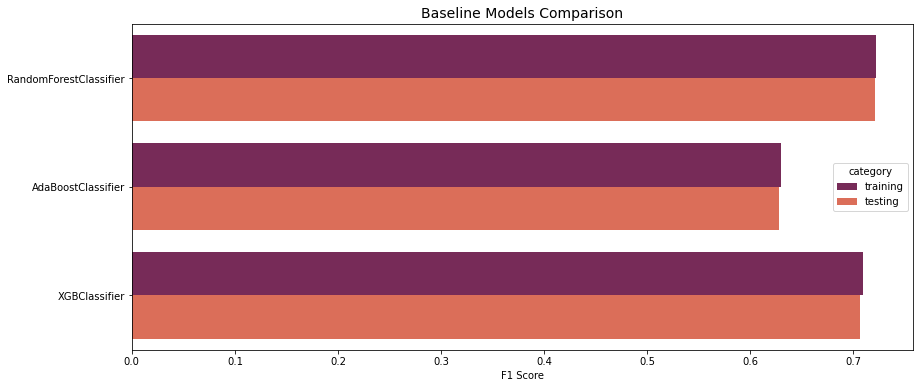

In [36]:
plt.figure(figsize=(14, 6))
sns.barplot(y='model', x='score', data=evaluation, hue='category', palette='rocket')
plt.title('Baseline Models Comparison', size=14)
plt.ylabel('')
plt.xlabel('F1 Score')
plt.show()

## *5.5 Hyperparameter Tuning Using Optuna*

After finding that the RandomForest model has the highest performance, the next step is to perform hyperparameter tuning using the Optuna library. This library is able to find the best parameter composition that can be used by the model to achieve its maximum capability.

To shorten the tuning process, I'll use 5 trials where the model will look for 5 composition parameters and try to get the highest value.

In [51]:
def objective(trial, X_train = X_train_prep, y_train = y_train):
    criterions = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 32, log = True)

    clf = RandomForestClassifier(n_estimators=1000,
                                max_depth = max_depth,
                                n_jobs = -1,
                                max_features = 'sqrt',
                                criterion = criterions)

    clf.fit(X_train_prep, y_train)
    preds = clf.predict(X_test_prep)
    return f1_score(y_test, preds)

In [52]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=5)

[I 2022-09-19 13:02:20,695] A new study created in memory with name: no-name-fd404eba-c20e-4da1-91f7-eeed3a26aede
[I 2022-09-19 13:02:28,492] Trial 0 finished with value: 0.72136292311141 and parameters: {'criterion': 'gini', 'max_depth': 20}. Best is trial 0 with value: 0.72136292311141.
[I 2022-09-19 13:02:37,229] Trial 1 finished with value: 0.7220611197858577 and parameters: {'criterion': 'entropy', 'max_depth': 27}. Best is trial 1 with value: 0.7220611197858577.
[I 2022-09-19 13:02:42,404] Trial 2 finished with value: 0.6136115657392253 and parameters: {'criterion': 'gini', 'max_depth': 6}. Best is trial 1 with value: 0.7220611197858577.
[I 2022-09-19 13:02:51,159] Trial 3 finished with value: 0.7207690587972279 and parameters: {'criterion': 'entropy', 'max_depth': 26}. Best is trial 1 with value: 0.7220611197858577.
[I 2022-09-19 13:02:56,428] Trial 4 finished with value: 0.4970356533744823 and parameters: {'criterion': 'gini', 'max_depth': 4}. Best is trial 1 with value: 0.7220

In [53]:
trial = study.best_trial
print('Best f1 score: {}'.format(trial.value))

Best f1 score: 0.7220611197858577


In [54]:
optuna.visualization.plot_optimization_history(study)

In [55]:
optuna.visualization.plot_parallel_coordinate(study)

In [56]:
optuna.visualization.plot_param_importances(study)

## *5.6 Create Model with Best Parameter*

Although the result after tuning is not significant changed by only 0.01 increase, we can still create the model with best parameters.


In [57]:
best_trial = study.best_trial.params
best_trial

{'criterion': 'entropy', 'max_depth': 27}

In [58]:
rfc_tuned = RandomForestClassifier(criterion='entropy',
                                    n_estimators=1000,
                                    max_depth=27,
                                    n_jobs = -1,
                                    max_features='sqrt',
                                    random_state=89)

rfc_tuned.fit(X_train_prep, y_train)
preds = rfc_tuned.predict(X_test_prep)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     15839
           1       0.75      0.70      0.72      9233

    accuracy                           0.80     25072
   macro avg       0.79      0.78      0.78     25072
weighted avg       0.80      0.80      0.80     25072

[[13637  2202]
 [ 2772  6461]]


## *5.7 Threshold Adjustment*

As the recall value is still slightly lower than the precision value, we're going to change the standard threshold value 0.5 to 0.3. As a result, the F1 score rose about 0.01 from the previous score with the recall score changed the prediction value from 70% to 85%.

In [59]:
print('Classif Report:\n',classification_report(y_test, rfc_tuned.predict_proba(X_test_prep)[:,1] >= 0.3)) 
print('Confusion Matrix:\n',confusion_matrix(y_test, rfc_tuned.predict_proba(X_test_prep)[:,1] >= 0.3))

Classif Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     15839
           1       0.64      0.85      0.73      9233

    accuracy                           0.77     25072
   macro avg       0.77      0.79      0.76     25072
weighted avg       0.80      0.77      0.77     25072

Confusion Matrix:
 [[11366  4473]
 [ 1356  7877]]


## *5.8 ROC AUC Score*

- **Sensitivity / True Positive Rate / Recall** tells us what proportion of the positive class got correctly classified.

    Formula: TP/(TP+FN)

    Example: proportion of the actual people who cancel that were correctly detected by the model.

- **False Negative Rate** tells us what proportion of the positive class got incorrectly classified by the classifier. A higher TPR and a lower FNR is desirable if we want to correctly classify the positive class.

    Formula: FN/(TP+FN)

- **Specificity / True Negative Rate** tells us what proportion of the negative class got correctly classified.

    Formula: TN/(TN+FP)

    Example: proportion of people who won't cancel were correctly identified by the model.

- **False Positive Rate** tells us what proportion of the negative class got incorrectly classified by the classifier. A higher TNR and a lower FPR is desirable if we want to correctly classify the negative class.

    Formula: FP/(TN+FP) = 1 - Specificity

**The Receiver Operator Characteristic (ROC) curve**  
An evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

**The higher the AUC**, **the better the performance** of the model at distinguishing between the positive and negative classes. Here, our model produces an AUC score of 0.79 which is categorized as an considerable good in distinguishing positive and negative class.

Source: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

<function matplotlib.pyplot.show(close=None, block=None)>

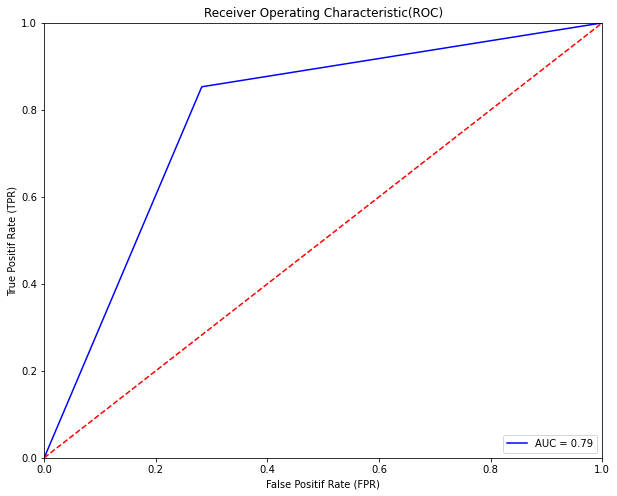

In [60]:
probs = rfc_tuned.predict_proba(X_test_prep)
preds = probs[:,1] >= 0.3
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positif Rate (TPR)')
plt.xlabel('False Positif Rate (FPR)')
plt.show


## *5.9 Feature Importance*

When we fit a supervised machine learning (ML) model, we often want to understand which features are most associated with our outcome of interest. Features that are highly associated with the outcome are considered more “important”. It may also be used for model inspection and communication. For example, stakeholders may be interested in understanding which features are most important for prediction. 

For technical team, it can use it as a filter method to remove irrelevant features from our model and only retain the ones that are most highly associated with our outcome of interest.

Based on the result of feature importance below, it shows that the following features gives the most significant impact on the model output in which we can pay more attention to:
1. Deposit type (Non-refund)
2. Total of special request 
3. Market segment (Offline TA/TO)
4. Required car parking spaces
5. Country (France & Great Britain)
6. Booking changes

In [61]:
xgb_fi = pd.DataFrame(rfc_tuned.feature_importances_.T, index = X_test_prep.columns, columns = ["Feature Importance"])

In [62]:
xgb_fi.sort_values("Feature Importance", ascending = False)

,Feature Importance
onehot__x0_Non Refund,0.255826
num__total_of_special_requests,0.106750
binary__2_2,0.094632
num__required_car_parking_spaces,0.072380
binary__0_6,0.066161
binary__0_5,0.059957
num__booking_changes,0.056941
binary__2_0,0.049327
onehot__x1_Transient,0.036544
binary__0_7,0.031250


# **6. CONCLUSION AND RECOMMENDATION**

# 6.1 Conclusion

Based on the performance of the machine learning models that have been trained, it is found that the performance of the Random Forest model is considerably good, producing the F1 score of 0.73 and the recall of 0.85. We can conclude that if our model is used to filter the list of guests who have made reservations, then our model is able to predict that 85% of these guests are likely to cancel later. Moreover, our model can also predict about 72% on guests who'll show up at the hotel (all this is based on the recall analysis).

The score of precision 1 suggests that our model has an accuracy of 64% of guests who actually cancel the bookings. It means that when our model predicts 85 guests who will likely to cancel the booking, the probability of being correct is 64%. It implies that there will still be guests who actually won't cancel but are predicted to cancel by 21% (Substraction of Recall and Precision of Class 1). 

Let's use an example to demonstrate it practically. If the cost for one standard room per night is USD 10, and suppose the number of guests who make reservations in certain period is 200 people (i.e 100 people might later cancel, and 100 people might show up later), then the calculation will be more or less like this:

**Without model (all guests who made reservations):**

    Total estimated revenue => 200 x $10  = $2,000 
    Total guests who show up => 100 people
    Total guest who cancelled last minute => 100 people (we don't anticipate this scenario)
    Unutilised room = 100 rooms
    Revenue loss => 100 rooms x $10  = $1000 

**With model (all guests who made reservations with predictions):**

    Total estimated revenue => 200 x $10  = $2,000 
    Total actual revenue (guests predicted to show up) => 72 rooms x $10 = $720

    Guests predicted to cancel => 85 people (recall 1/not cancelled is 85%)
    Predicted guests actually cancel => 64 people (precision 1/not cancelled is 64%)
    Predicted unutilised room = 85 rooms (guests who will cancel) yet we can immediately advertise them on website/online travel agency with better deals let's say 13% discount per night (https://www.nerdwallet.com/article/travel/is-it-cheaper-to-book-hotel-last-minute)
    Revenue after prediction = $720 + (85 * USD 10 - 13% disc) = USD 1,485

    False prediction of cancellation =  85 rooms - 64 rooms = 21 rooms
    Overbooking = 21 rooms (guests who don't cancel but predicted wrongly that we still advertise it as available rooms on website/travel agency could cause overbooking) 

    Solution: we can send confirmation email to these guests few days before check-in to update their bookings confirmation before advertising the rooms. 

    If they all confirm to show up, then the final total revenue will be as follows:
    $1,485 + (21 overbooking rooms x $10) = $ 1,695

    Estimated revenue loss => $2,000 - $1,695 = $ 305

In conclusion, by using this model, it can help booking managers to mitigate the risk of revenue loss caused by the booking cancellations and to anticipate the risk associated from overbooking rooms. 

CLASSIFICATION REPORT - RF TUNED:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     15839
           1       0.64      0.85      0.73      9233

    accuracy                           0.77     25072
   macro avg       0.77      0.79      0.76     25072
weighted avg       0.80      0.77      0.77     25072

CONFUSION MATRIX - RF TUNED


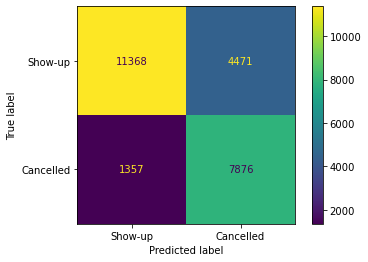

In [50]:
y_test_pred = rfc_tuned.predict_proba(X_test_prep)[:,1] >= 0.3
confusion_matrix_catboost = confusion_matrix(y_test, y_test_pred)


print('CLASSIFICATION REPORT - RF TUNED:\n', classification_report(y_test, y_test_pred) )

print("CONFUSION MATRIX - RF TUNED")
ConfusionMatrixDisplay(confusion_matrix_catboost, display_labels=np.array(['Show-up', 'Cancelled'])).plot();

# 6.2 Recommendation

Some recommendations to improve model performance with better accuracy of F1 prediction:

1. Adding new features or fields related to guest information, such as lead time, reservation time histories, complain details, and so on.

2. Experimenting with other ML algorithms that provide better prediction or changing hyperparameter tuning on the current model on a regular basis. Especially if there are seasonal holidays such as Summer holiday, Christmas and New Year holiday.

3. Analysing the data that our model continues to predict incorrectly to determine the reasons and characteristics